# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

# Battery B0006

In [ ]:
df = pd.read_csv('C:/Users/ibrah/Desktop/Masters/Dissertation Data Analysis - VS Code/vars_b6.csv')

In [3]:
df.head()

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,2008-04-02 13:08:17.921,3.864624,0.000082,24.682214,-0.001,-0.007,0.000,2.035338
1,1,1,0,1,charge,24,2008-04-02 13:08:17.921,3.469113,-4.059185,24.695407,-4.060,1.558,2.532,2.035338
2,1,1,0,2,charge,24,2008-04-02 13:08:17.921,3.994806,1.513750,24.711491,1.506,4.710,5.500,2.035338
3,1,1,0,3,charge,24,2008-04-02 13:08:17.921,4.005888,1.511389,24.739672,1.506,4.726,8.344,2.035338
4,1,1,0,4,charge,24,2008-04-02 13:08:17.921,4.012944,1.510817,24.753180,1.506,4.737,11.125,2.035338


In [ ]:
#View only one registry per cycle (charge and discharge)
cycles = df.filter(['cycle','cycle_type','type','timestamp']).drop_duplicates()
cycles

,cycle,cycle_type,type,timestamp
0,1,1,charge,2008-04-02 13:08:17.921
789,2,1,discharge,2008-04-02 15:25:41.593
986,3,2,charge,2008-04-02 16:37:51.984
1926,4,2,discharge,2008-04-02 19:43:48.406
2122,5,3,charge,2008-04-02 20:55:40.812
...,...,...,...,...
583759,334,168,charge,2008-05-26 21:41:33.468
587251,335,167,discharge,2008-05-27 15:52:41.359
587549,336,169,charge,2008-05-27 17:53:59.765
591153,337,168,discharge,2008-05-27 20:45:42.125


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591458 entries, 0 to 591457
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 591458 non-null  int64  
 1   cycle_type            591458 non-null  int64  
 2   cycle_idx             591458 non-null  int64  
 3   index                 591458 non-null  int64  
 4   type                  591458 non-null  object 
 5   ambient_temperature   591458 non-null  int64  
 6   timestamp             591458 non-null  object 
 7   Voltage_measured      591458 non-null  float64
 8   Current_measured      591458 non-null  float64
 9   Temperature_measured  591458 non-null  float64
 10  Current               591458 non-null  float64
 11  Voltage               591458 non-null  float64
 12  Time                  591458 non-null  float64
 13  Capacity              591453 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 63.

# Charge Cycle Variables

list of charge Variables:
1 Voltage_measured
2 Voltage_time_relationship
3 Current_measured
4 Current_measured_time_relationship
5 Temperature_measured
6 Temperature_measured_time_relationship
7 Current_charge
8 Current_charge_time_relationship
9 Voltage_charge
10 Voltage_charge_time_relationship
11 max_time_per_charge_cycle

In [8]:
# Charge cycles
ch = df.query('type =="charge"')
ch

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,2008-04-02 13:08:17.921,3.864624,0.000082,24.682214,-0.001,-0.007,0.000,2.035338
1,1,1,0,1,charge,24,2008-04-02 13:08:17.921,3.469113,-4.059185,24.695407,-4.060,1.558,2.532,2.035338
2,1,1,0,2,charge,24,2008-04-02 13:08:17.921,3.994806,1.513750,24.711491,1.506,4.710,5.500,2.035338
3,1,1,0,3,charge,24,2008-04-02 13:08:17.921,4.005888,1.511389,24.739672,1.506,4.726,8.344,2.035338
4,1,1,0,4,charge,24,2008-04-02 13:08:17.921,4.012944,1.510817,24.753180,1.506,4.737,11.125,2.035338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591453,338,170,615,0,charge,24,2008-05-28 11:09:42.046,0.979650,-0.005157,22.984433,0.000,-0.007,0.000,NaN
591454,338,170,615,1,charge,24,2008-05-28 11:09:42.046,-0.001422,-0.001326,22.984099,-0.001,-0.007,2.547,NaN
591455,338,170,615,2,charge,24,2008-05-28 11:09:42.046,4.985089,0.000203,22.986148,0.000,4.996,5.500,NaN
591456,338,170,615,3,charge,24,2008-05-28 11:09:42.046,4.985345,0.000329,22.994625,-0.001,4.996,8.312,NaN


In [ ]:
#Delete insocnsistent charge cycles (12, 33)
del_cycles = [12, 33, 170]
ch1 = ch[~ch['cycle_type'].isin(del_cycles)]

## Voltage measured VS Time - Charge

In [10]:
# Group the data by "cycle" and find the maximum voltage measured and its corresponding time
# max_values = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])
max_values = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])

# Reset the index of the resulting DataFrame
max_values.reset_index(drop=True, inplace=True)

# Extract the maximum voltage measured and time values
max_voltages = max_values['Voltage_measured']
max_time = max_values['Time']

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\1385262537.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_values = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])


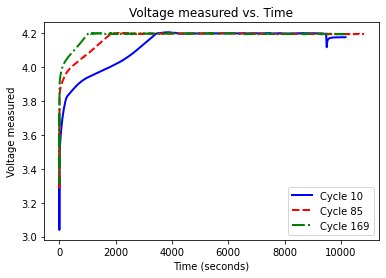

In [11]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured')
plt.title('Voltage measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [12]:
#cycle_type_C = cycle type charge
#Time_VMC = Time voltage measured Charge
#type_C = Type Charge
#Voltage_measured_C
v1v2 = max_values[['cycle_type','type', 'Voltage_measured', 'Time']].copy()
v1v2.rename(columns={'type':'type_C', 'Voltage_measured':'Voltage_measured_C', 'Time':'Time_Voltage_Measured_C'}, inplace=True)
v1v2

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C
0,1,charge,4.204085,1421.485
1,2,charge,4.207016,3990.797
2,3,charge,4.207291,4151.828
3,4,charge,4.206716,3895.718
4,5,charge,4.207283,4018.390
...,...,...,...,...
162,165,charge,4.202178,1456.844
163,166,charge,4.201764,1715.172
164,167,charge,4.201756,1696.859
165,168,charge,4.201707,1608.875


In [13]:
#Check data type
v1v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   type_C                   167 non-null    object 
 2   Voltage_measured_C       167 non-null    float64
 3   Time_Voltage_Measured_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current Measured vs Time - Charge

In [ ]:
cycle_list = np.arange(1,170).tolist()
for cycle in del_cycles:
    if cycle in cycle_list:
        cycle_list.remove(cycle)

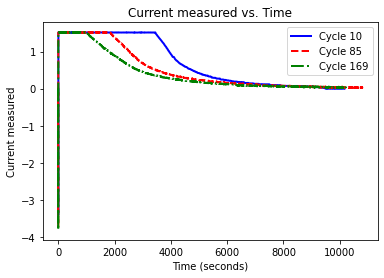

In [15]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured')
plt.title('Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v3v4 = pd.DataFrame(columns=['cycle_type','break_time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch1[ch1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v3v4.loc[idx,'cycle_type']=c
    bi = 10 + result[0]
    v3v4.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v3v4.loc[idx,'break_current']=cycle.query('index==@change_point_index').iloc[0,8]
    
v3v4.rename(columns={'break_time':'Current_measured_time_C', 'break_current':'Current_measured_C'}, inplace = True)

In [17]:
#Check data type
v3v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    object 
 1   Current_measured_time_C  167 non-null    object 
 2   Current_measured_C       167 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


In [18]:
#Change data type
v3v4['cycle_type'] = v3v4['cycle_type'].astype('int64')
v3v4[['Current_measured_time_C', 'Current_measured_C']] = v3v4[['Current_measured_time_C', 'Current_measured_C']].astype('float64')
v3v4

,cycle_type,Current_measured_time_C,Current_measured_C
0,1,771.282,1.512465
1,2,3608.812,1.512954
2,3,3604.922,1.511510
3,4,3546.234,1.512001
4,5,3544.828,1.512208
...,...,...,...
162,165,1018.047,1.514266
163,166,1005.219,1.511856
164,167,992.500,1.511459
165,168,992.922,1.480299


## Temperature Measured vs Time - Charge

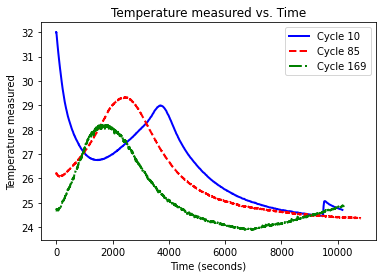

In [19]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured')
plt.title('Temperature measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [20]:
# Group the data by "cycle" and find the maximum temperature measured and its corresponding time
#tm = temperature measured
#Time_TMC = Time temperature meausred
tm = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v5v6 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v5v6.rename(columns={'type':'type_C','Temperature_measured':'Temperature_measured_C','Time':'Time_temperature_measured_C'}, inplace=True)
v5v6

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\3058392733.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])


,cycle_type,type_C,Temperature_measured_C,Time_temperature_measured_C
0,1,charge,27.355870,1058.438
1,2,charge,29.033796,3894.328
2,3,charge,29.147366,3852.281
3,4,charge,29.071167,3841.531
4,5,charge,28.970615,3840.750
...,...,...,...,...
162,165,charge,28.542199,1703.391
163,166,charge,28.565426,1639.344
164,167,charge,28.631428,1574.953
165,168,charge,28.658802,1673.953


In [21]:
v5v6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   167 non-null    int64  
 1   type_C                       167 non-null    object 
 2   Temperature_measured_C       167 non-null    float64
 3   Time_temperature_measured_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current at Charge vs Time - Charge

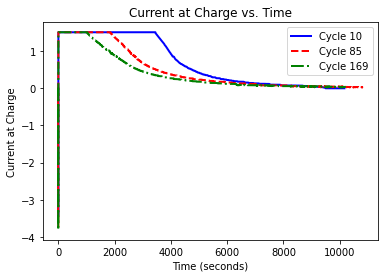

In [22]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge')
plt.title('Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Time_CaC = time current at charge
v7v8 = pd.DataFrame(columns=['cycle_type','Time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch[ch['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v7v8.loc[idx,'cycle_type']=c
    v7v8.loc[idx,'Time']=cycle.query('index==@change_point_index').iloc[0,12]
    v7v8.loc[idx,'break_current_at_charge']=cycle.query('index==@change_point_index').iloc[0,10]

v7v8.rename(columns={'Time':'Time_current_C', 'break_current_at_charge':'Current_C'},inplace=True)

In [24]:
#Check data type
v7v8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    object 
 1   Time_current_C  167 non-null    object 
 2   Current_C       167 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


In [25]:
#Change data type
v7v8['cycle_type'] = v7v8['cycle_type'].astype('int64')
v7v8['Time_current_C'] = v7v8['Time_current_C'].astype('float64')
v7v8

,cycle_type,Time_current_C,Current_C
0,1,771.282,1.506
1,2,3608.812,1.506
2,3,3604.922,1.506
3,4,4140.625,0.905
4,5,3544.828,1.507
...,...,...,...
162,165,1018.047,1.507
163,166,9210.187,0.026
164,167,992.500,1.507
165,168,992.922,1.477


## Voltage at charge vs time - Charge

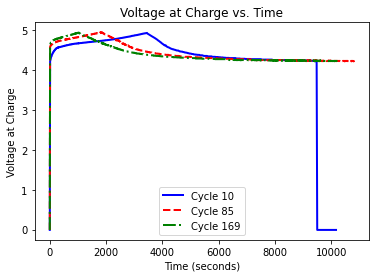

In [26]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge')
plt.title('Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [27]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
#Time_VCC = time voltage at charge - charge
vt = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])

# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v9v10 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v9v10.rename(columns={'type':'type_C','Voltage':'Voltage_C','Time':'Time_Voltage_C'}, inplace=True)
v9v10 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\1855440191.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])


,cycle_type,type_C,Voltage_C,Time_Voltage_C
0,1,charge,4.926,765.750
1,2,charge,4.926,3596.406
2,3,charge,4.926,3604.922
3,4,charge,4.926,3570.687
4,5,charge,4.926,3544.828
...,...,...,...,...
162,165,charge,4.932,1002.907
163,166,charge,4.932,992.609
164,167,charge,4.932,972.625
165,168,charge,4.932,980.031


In [28]:
#Check data type
v9v10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   type_C          167 non-null    object 
 2   Voltage_C       167 non-null    float64
 3   Time_Voltage_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Total Time per charge cycle

In [29]:
#Total time Charge var
# Group the DataFrame by "cycle" and select the maximum value of "time_seconds"
chr_total_time = ch1.groupby('cycle_type')['Time'].max()

t_tm = []
# Print the maximum time for each cycle
for cycle, chr_total_time in chr_total_time.items():
    Cycle = cycle
    chr_total_time = chr_total_time
    t_tm.append([Cycle,chr_total_time])

v11 = pd.DataFrame(t_tm, columns=['cycle_type', 'Charge Total Time'])
# t_t.rename(columns={'cycle_type':'cycle_type'},inplace=True)
v11

,cycle_type,Charge Total Time
0,1,7597.875
1,2,10516.000
2,3,10484.547
3,4,10397.890
4,5,10495.203
...,...,...
162,165,10154.094
163,166,10316.906
164,167,10571.390
165,168,9892.375


In [30]:
#Check data type
v11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cycle_type         167 non-null    int64  
 1   Charge Total Time  167 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [ ]:
#Plot
fig, ax = plt.subplots(1, 1)
ax.plot(v11['cycle_type'], v11['Charge Total Time'])
plt.xlabel('Cycle Type')
plt.ylabel('Charge Total Time')
plt.title('Charge - Total Time vs. Cycle Type')
plt.show()

## Capacity

In [ ]:
#View only one registry per cycle (charge)
cap = ch1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap

,cycle_type,type,Capacity
0,1,charge,2.035338
986,2,charge,2.025140
2122,3,charge,2.013326
3254,4,charge,2.013285
4381,5,charge,2.000528
...,...,...,...
571895,165,charge,1.153818
575786,166,charge,1.164401
579726,167,charge,1.158797
583759,168,charge,1.174975


## All Charge Variables

In [32]:
merge_= ['cycle_type'] 

In [33]:
acv = pd.merge(v1v2, v3v4[merge_ + ["Current_measured_time_C", "Current_measured_C"]], how = "outer", on="cycle_type")
acv = pd.merge(acv, v5v6[merge_ +['Temperature_measured_C', 'Time_temperature_measured_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v7v8[merge_ +['Current_C', 'Time_current_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v9v10[merge_ +['Voltage_C', 'Time_Voltage_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v11, how = "outer", on="cycle_type")
acv = pd.merge(acv, cap[merge_ +['Capacity']], how = "outer", on = "cycle_type")
acv['new_cycle_type'] = np.arange(1,168)
acv

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity,new_cycle_type
0,1,charge,4.204085,1421.485,771.282,1.512465,27.355870,1058.438,1.506,771.282,4.926,765.750,7597.875,2.035338,1
1,2,charge,4.207016,3990.797,3608.812,1.512954,29.033796,3894.328,1.506,3608.812,4.926,3596.406,10516.000,2.025140,2
2,3,charge,4.207291,4151.828,3604.922,1.511510,29.147366,3852.281,1.506,3604.922,4.926,3604.922,10484.547,2.013326,3
3,4,charge,4.206716,3895.718,3546.234,1.512001,29.071167,3841.531,0.905,4140.625,4.926,3570.687,10397.890,2.013285,4
4,5,charge,4.207283,4018.390,3544.828,1.512208,28.970615,3840.750,1.507,3544.828,4.926,3544.828,10495.203,2.000528,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,165,charge,4.202178,1456.844,1018.047,1.514266,28.542199,1703.391,1.507,1018.047,4.932,1002.907,10154.094,1.153818,163
163,166,charge,4.201764,1715.172,1005.219,1.511856,28.565426,1639.344,0.026,9210.187,4.932,992.609,10316.906,1.164401,164
164,167,charge,4.201756,1696.859,992.500,1.511459,28.631428,1574.953,1.507,992.500,4.932,972.625,10571.390,1.158797,165
165,168,charge,4.201707,1608.875,992.922,1.480299,28.658802,1673.953,1.477,992.922,4.932,980.031,9892.375,1.174975,166


In [34]:
#Reorganize the columns
last_column = acv.pop(acv.columns[-1])
acv.insert(0, last_column.name, last_column)
acv

,new_cycle_type,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity
0,1,1,charge,4.204085,1421.485,771.282,1.512465,27.355870,1058.438,1.506,771.282,4.926,765.750,7597.875,2.035338
1,2,2,charge,4.207016,3990.797,3608.812,1.512954,29.033796,3894.328,1.506,3608.812,4.926,3596.406,10516.000,2.025140
2,3,3,charge,4.207291,4151.828,3604.922,1.511510,29.147366,3852.281,1.506,3604.922,4.926,3604.922,10484.547,2.013326
3,4,4,charge,4.206716,3895.718,3546.234,1.512001,29.071167,3841.531,0.905,4140.625,4.926,3570.687,10397.890,2.013285
4,5,5,charge,4.207283,4018.390,3544.828,1.512208,28.970615,3840.750,1.507,3544.828,4.926,3544.828,10495.203,2.000528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.202178,1456.844,1018.047,1.514266,28.542199,1703.391,1.507,1018.047,4.932,1002.907,10154.094,1.153818
163,164,166,charge,4.201764,1715.172,1005.219,1.511856,28.565426,1639.344,0.026,9210.187,4.932,992.609,10316.906,1.164401
164,165,167,charge,4.201756,1696.859,992.500,1.511459,28.631428,1574.953,1.507,992.500,4.932,972.625,10571.390,1.158797
165,166,168,charge,4.201707,1608.875,992.922,1.480299,28.658802,1673.953,1.477,992.922,4.932,980.031,9892.375,1.174975


In [35]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   new_cycle_type               167 non-null    int32  
 1   cycle_type                   167 non-null    int64  
 2   type_C                       167 non-null    object 
 3   Voltage_measured_C           167 non-null    float64
 4   Time_Voltage_Measured_C      167 non-null    float64
 5   Current_measured_time_C      167 non-null    float64
 6   Current_measured_C           167 non-null    float64
 7   Temperature_measured_C       167 non-null    float64
 8   Time_temperature_measured_C  167 non-null    float64
 9   Current_C                    167 non-null    float64
 10  Time_current_C               167 non-null    float64
 11  Voltage_C                    167 non-null    float64
 12  Time_Voltage_C               167 non-null    float64
 13  Charge Total Time   

# Discharge Cycle Variables

In [37]:
ds = df.query("type=='discharge'")

In [38]:
ds

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
789,2,1,1,0,discharge,24,2008-04-02 15:25:41.593,4.179800,-0.002366,24.277568,-0.0006,0.000,0.000,2.035338
790,2,1,1,1,discharge,24,2008-04-02 15:25:41.593,4.179823,0.000434,24.277073,-0.0006,4.195,16.781,2.035338
791,2,1,1,2,discharge,24,2008-04-02 15:25:41.593,3.966528,-2.014242,24.366226,-1.9990,3.070,35.703,2.035338
792,2,1,1,3,discharge,24,2008-04-02 15:25:41.593,3.945886,-2.008730,24.515123,-1.9990,3.045,53.781,2.035338
793,2,1,1,4,discharge,24,2008-04-02 15:25:41.593,3.930354,-2.013381,24.676053,-1.9990,3.026,71.922,2.035338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591448,337,168,613,295,discharge,24,2008-05-27 20:45:42.125,3.689577,-0.001671,32.367946,0.0006,0.000,2781.312,1.185675
591449,337,168,613,296,discharge,24,2008-05-27 20:45:42.125,3.690020,-0.001914,32.464485,0.0006,0.000,2791.062,1.185675
591450,337,168,613,297,discharge,24,2008-05-27 20:45:42.125,3.690708,-0.002706,32.337187,0.0006,0.000,2800.828,1.185675
591451,337,168,613,298,discharge,24,2008-05-27 20:45:42.125,3.691356,-0.002952,32.252598,0.0006,0.000,2810.640,1.185675


In [ ]:
#Consider Absolute values for Current values
ds['Current'] = ds['Current'].abs()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\3206833995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Current'] = ds['Current'].abs()


In [ ]:
# Inconsistent discharge cycle 90
del_cycles = [90]
ds1 = ds[~ds['cycle_type'].isin(del_cycles)]

## Voltage measured vs Time - Discharge

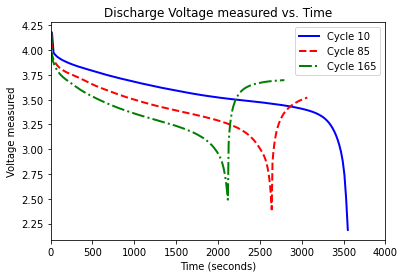

In [41]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Adjust these values according to your desired range
plt.xlim(0, 4000) 

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured')
plt.title('Discharge Voltage measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [42]:
# Group the data by "cycle" and find the minimum voltage measured and its corresponding time
min_values = ds1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])

# Reset the index of the resulting DataFrame
min_values.reset_index(drop=True, inplace=True)

# Extract the minimum voltage measured and time values
min_voltages = min_values['Voltage_measured']
min_time = max_values['Time']

v12v13 = min_values[['cycle_type','type', 'Voltage_measured', 'Time']].copy()
v12v13.rename(columns={'type':'type_D', 'Voltage_measured':'Voltage_measured_D', 'Time':'Time_voltage_measured_D'}, inplace=True)
v12v13

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\403625945.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_values = ds1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])


,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D
0,1,discharge,2.475768,3690.234
1,2,discharge,2.351526,3672.344
2,3,discharge,2.440480,3651.641
3,4,discharge,2.479156,3631.563
4,5,discharge,2.280188,3629.172
...,...,...,...,...
162,164,discharge,2.481190,2108.406
163,165,discharge,2.491537,2118.047
164,166,discharge,2.409041,2117.344
165,167,discharge,2.475768,2146.172


In [43]:
v12v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   type_D                   167 non-null    object 
 2   Voltage_measured_D       167 non-null    float64
 3   Time_voltage_measured_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current Measured vs Time - Discharge

In [44]:
cycle_list1 = np.arange(1,169).tolist()

In [45]:
for cycle in del_cycles:
    if cycle in cycle_list:
        cycle_list1.remove(cycle)

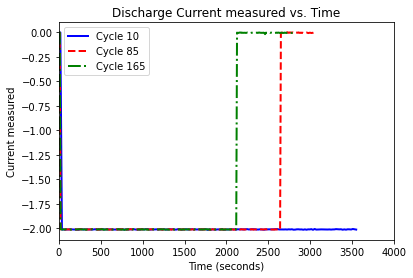

In [46]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Adjust these values according to your desired range
plt.xlim(0, 4000)  

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured')
plt.title('Discharge Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v14v15 = pd.DataFrame(columns=['cycle_type', 'break_time'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds1[ds1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time 
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v14v15.loc[idx,'cycle_type']=c
    v14v15.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v14v15.loc[idx,'Current measured']=cycle.query('index==@change_point_index').iloc[0,8]

v14v15.rename(columns={'break_time':'Time_current_measured_D', 'Current measured':'Current_measured_D'}, inplace = True)
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,2494.031,-2.010906
1,2,3171.766,-2.006719
2,3,1462.781,-2.008280
3,4,3074.688,-2.008224
4,5,1277.203,-2.008439
...,...,...,...
162,164,2108.406,-2.011893
163,165,2108.734,-2.009927
164,166,2108.016,-2.008421
165,167,2155.719,-0.000424


In [48]:
v14v15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    object 
 1   Time_current_measured_D  167 non-null    object 
 2   Current_measured_D       167 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


In [49]:
#Change data type
v14v15['cycle_type'] = v14v15['cycle_type'].astype('int64')
v14v15['Time_current_measured_D'] = v14v15['Time_current_measured_D'].astype('float64')
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,2494.031,-2.010906
1,2,3171.766,-2.006719
2,3,1462.781,-2.008280
3,4,3074.688,-2.008224
4,5,1277.203,-2.008439
...,...,...,...
162,164,2108.406,-2.011893
163,165,2108.734,-2.009927
164,166,2108.016,-2.008421
165,167,2155.719,-0.000424


## Temperature Measured vs Time - Discharge

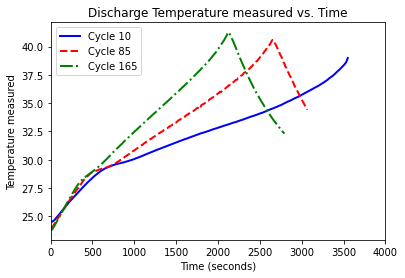

In [50]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Adjust these values according to your desired range
plt.xlim(0, 4000) 

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured')
plt.title('Discharge Temperature measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [51]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
tm = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmin()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v16v17 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v16v17.rename(columns={'type':'type_D','Temperature_measured':'Temperature_measured_D','Time':'Time_temperature_measured_D'}, inplace=True)
v16v17

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\107520930.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmin()])


,cycle_type,type_D,Temperature_measured_D,Time_temperature_measured_D
0,1,discharge,30.183733,1001.766
1,2,discharge,30.349189,1002.000
2,3,discharge,30.318939,1002.156
3,4,discharge,30.235413,1001.922
4,5,discharge,30.154192,1001.875
...,...,...,...,...
162,164,discharge,32.113473,2793.390
163,165,discharge,32.299363,2793.390
164,166,discharge,32.416754,2792.485
165,167,discharge,32.371097,2802.016


In [52]:
v16v17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   167 non-null    int64  
 1   type_D                       167 non-null    object 
 2   Temperature_measured_D       167 non-null    float64
 3   Time_temperature_measured_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current at Charge vs time - Discharge

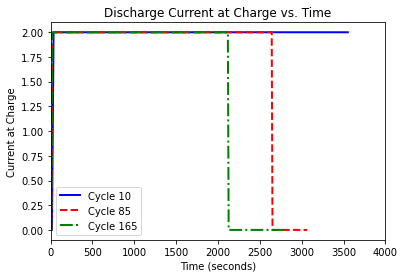

In [53]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Adjust these values according to your desired range
plt.xlim(0, 4000) 

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge')
plt.title('Discharge Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v18v19 = pd.DataFrame(columns=['cycle_type','break_time', 'Current'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds1[ds1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time 
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v18v19.loc[idx,'cycle_type']=c
    v18v19.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v18v19.loc[idx,'Current']=cycle.query('index==@change_point_index').iloc[0,10]

v18v19.rename(columns={'break_time':'Time_current_D', 'Current':'Current_D'},inplace=True)
v18v19

,cycle_type,Time_current_D,Current_D
0,1,1185.641,1.9992
1,2,910.25,1.999
2,3,1185.844,1.999
3,4,910.078,1.999
4,5,1554.609,1.9992
...,...,...,...
162,164,2108.406,1.999
163,165,2108.734,1.999
164,166,2108.016,1.999
165,167,2155.719,0.0006


In [55]:
#Change data type
v18v19['cycle_type'] = v18v19['cycle_type'].astype('int64')
v18v19[['Time_current_D','Current_D']] = v18v19[['Time_current_D','Current_D']] .astype('float64')
v18v19

,cycle_type,Time_current_D,Current_D
0,1,1185.641,1.9992
1,2,910.250,1.9990
2,3,1185.844,1.9990
3,4,910.078,1.9990
4,5,1554.609,1.9992
...,...,...,...
162,164,2108.406,1.9990
163,165,2108.734,1.9990
164,166,2108.016,1.9990
165,167,2155.719,0.0006


In [56]:
v18v19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   Time_current_D  167 non-null    float64
 2   Current_D       167 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.3 KB


## Voltage at Charge - Discharge

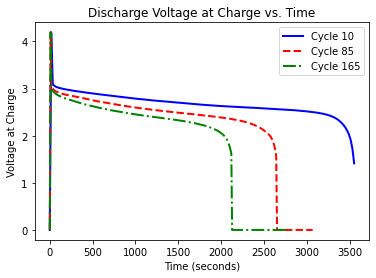

In [57]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge')
plt.title('Discharge Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [58]:
# Group the data by "cycle" and find the maximum voltage and its' corresponding time
#Time_VCC = time voltage at charge - charge
vt = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])

# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v20v21 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v20v21.rename(columns={'type':'type_D','Voltage':'Voltage_D','Time':'Time_voltage_D'}, inplace=True)
v20v21 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\4261509000.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])


,cycle_type,type_D,Voltage_D,Time_voltage_D
0,1,discharge,1.653,3690.234
1,2,discharge,1.543,3672.344
2,3,discharge,1.650,3651.641
3,4,discharge,1.690,3631.563
4,5,discharge,1.488,3629.172
...,...,...,...,...
162,164,discharge,0.000,2117.953
163,165,discharge,0.000,2127.562
164,166,discharge,0.000,2126.907
165,167,discharge,0.000,2155.719


In [59]:
v20v21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   type_D          167 non-null    object 
 2   Voltage_D       167 non-null    float64
 3   Time_voltage_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Total discharge time

In [60]:
# Disharge Total Time
d_total_time = ds1.groupby('cycle_type')['Time'].max()

td_tm = []

# Print the maximum time for each cycle
for cycle, d_total_time in d_total_time.items():
    Cycle = cycle
    d_total_time = d_total_time
    td_tm.append([Cycle,d_total_time])

td_t = pd.DataFrame(td_tm, columns=['cycle_type', 'Discharge Total Time'])

td_t

,cycle_type,Discharge Total Time
0,1,3690.234
1,2,3672.344
2,3,3651.641
3,4,3631.563
4,5,3629.172
...,...,...
162,164,2793.390
163,165,2793.390
164,166,2792.485
165,167,2802.016


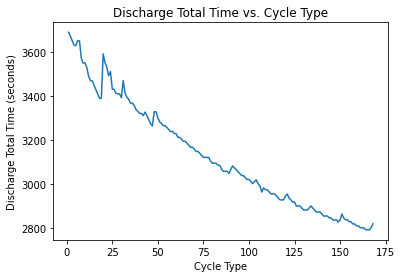

In [ ]:
#Plot
plt.plot(td_t['cycle_type'], td_t['Discharge Total Time'])
plt.xlabel('Cycle Type')
plt.ylabel('Discharge Total Time (seconds)')
plt.title('Discharge Total Time vs. Cycle Type')
plt.show()

## Capacity -Discharge

In [ ]:
#View only one registry per cycle (discharge)
cap_ = ds1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap_

,cycle_type,type,Capacity
789,1,discharge,2.035338
1926,2,discharge,2.025140
3059,3,discharge,2.013326
4187,4,discharge,2.013285
5318,5,discharge,2.000528
...,...,...,...
575489,164,discharge,1.153818
579429,165,discharge,1.164401
583462,166,discharge,1.158797
587251,167,discharge,1.174975


## All discharge variables

In [63]:
merge_= ['cycle_type'] 

In [64]:
adv = pd.merge(v12v13, v14v15[merge_ + ["Time_current_measured_D", "Current_measured_D"]], how = "outer", on="cycle_type")
adv = pd.merge(adv, v16v17[merge_ +['Temperature_measured_D', 'Time_temperature_measured_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v18v19[merge_ +['Current_D', 'Time_current_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v20v21[merge_ +['Voltage_D', 'Time_voltage_D']], how = "outer", on="cycle_type")
adv =pd.merge(adv, td_t[merge_ + ["Discharge Total Time"]], how = "outer", on="cycle_type")
adv['new_cycle_type'] = np.arange(1,168)

In [65]:
#Reorganize the columns
last_column = adv.pop(adv.columns[-1])
adv.insert(0, last_column.name, last_column)
adv

,new_cycle_type,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,discharge,2.475768,3690.234,2494.031,-2.010906,30.183733,1001.766,1.9992,1185.641,1.653,3690.234,3690.234
1,2,2,discharge,2.351526,3672.344,3171.766,-2.006719,30.349189,1002.000,1.9990,910.250,1.543,3672.344,3672.344
2,3,3,discharge,2.440480,3651.641,1462.781,-2.008280,30.318939,1002.156,1.9990,1185.844,1.650,3651.641,3651.641
3,4,4,discharge,2.479156,3631.563,3074.688,-2.008224,30.235413,1001.922,1.9990,910.078,1.690,3631.563,3631.563
4,5,5,discharge,2.280188,3629.172,1277.203,-2.008439,30.154192,1001.875,1.9992,1554.609,1.488,3629.172,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,164,discharge,2.481190,2108.406,2108.406,-2.011893,32.113473,2793.390,1.9990,2108.406,0.000,2117.953,2793.390
163,164,165,discharge,2.491537,2118.047,2108.734,-2.009927,32.299363,2793.390,1.9990,2108.734,0.000,2127.562,2793.390
164,165,166,discharge,2.409041,2117.344,2108.016,-2.008421,32.416754,2792.485,1.9990,2108.016,0.000,2126.907,2792.485
165,166,167,discharge,2.475768,2146.172,2155.719,-0.000424,32.371097,2802.016,0.0006,2155.719,0.000,2155.719,2802.016


# All Variables

In [66]:
av = pd.merge(acv, adv, how = "outer", on = "new_cycle_type")

In [67]:
av

,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,charge,4.204085,1421.485,771.282,1.512465,27.355870,1058.438,1.506,...,3690.234,2494.031,-2.010906,30.183733,1001.766,1.9992,1185.641,1.653,3690.234,3690.234
1,2,2,charge,4.207016,3990.797,3608.812,1.512954,29.033796,3894.328,1.506,...,3672.344,3171.766,-2.006719,30.349189,1002.000,1.9990,910.250,1.543,3672.344,3672.344
2,3,3,charge,4.207291,4151.828,3604.922,1.511510,29.147366,3852.281,1.506,...,3651.641,1462.781,-2.008280,30.318939,1002.156,1.9990,1185.844,1.650,3651.641,3651.641
3,4,4,charge,4.206716,3895.718,3546.234,1.512001,29.071167,3841.531,0.905,...,3631.563,3074.688,-2.008224,30.235413,1001.922,1.9990,910.078,1.690,3631.563,3631.563
4,5,5,charge,4.207283,4018.390,3544.828,1.512208,28.970615,3840.750,1.507,...,3629.172,1277.203,-2.008439,30.154192,1001.875,1.9992,1554.609,1.488,3629.172,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.202178,1456.844,1018.047,1.514266,28.542199,1703.391,1.507,...,2108.406,2108.406,-2.011893,32.113473,2793.390,1.9990,2108.406,0.000,2117.953,2793.390
163,164,166,charge,4.201764,1715.172,1005.219,1.511856,28.565426,1639.344,0.026,...,2118.047,2108.734,-2.009927,32.299363,2793.390,1.9990,2108.734,0.000,2127.562,2793.390
164,165,167,charge,4.201756,1696.859,992.500,1.511459,28.631428,1574.953,1.507,...,2117.344,2108.016,-2.008421,32.416754,2792.485,1.9990,2108.016,0.000,2126.907,2792.485
165,166,168,charge,4.201707,1608.875,992.922,1.480299,28.658802,1673.953,1.477,...,2146.172,2155.719,-0.000424,32.371097,2802.016,0.0006,2155.719,0.000,2155.719,2802.016


In [68]:
# column with the name of the cell
av['Battery_id'] = "B0006"

In [69]:
#Reorganize the columns
last_column = av.pop(av.columns[-1])
av.insert(0, last_column.name, last_column)
av

,Battery_id,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,B0006,1,1,charge,4.204085,1421.485,771.282,1.512465,27.355870,1058.438,...,3690.234,2494.031,-2.010906,30.183733,1001.766,1.9992,1185.641,1.653,3690.234,3690.234
1,B0006,2,2,charge,4.207016,3990.797,3608.812,1.512954,29.033796,3894.328,...,3672.344,3171.766,-2.006719,30.349189,1002.000,1.9990,910.250,1.543,3672.344,3672.344
2,B0006,3,3,charge,4.207291,4151.828,3604.922,1.511510,29.147366,3852.281,...,3651.641,1462.781,-2.008280,30.318939,1002.156,1.9990,1185.844,1.650,3651.641,3651.641
3,B0006,4,4,charge,4.206716,3895.718,3546.234,1.512001,29.071167,3841.531,...,3631.563,3074.688,-2.008224,30.235413,1001.922,1.9990,910.078,1.690,3631.563,3631.563
4,B0006,5,5,charge,4.207283,4018.390,3544.828,1.512208,28.970615,3840.750,...,3629.172,1277.203,-2.008439,30.154192,1001.875,1.9992,1554.609,1.488,3629.172,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0006,163,165,charge,4.202178,1456.844,1018.047,1.514266,28.542199,1703.391,...,2108.406,2108.406,-2.011893,32.113473,2793.390,1.9990,2108.406,0.000,2117.953,2793.390
163,B0006,164,166,charge,4.201764,1715.172,1005.219,1.511856,28.565426,1639.344,...,2118.047,2108.734,-2.009927,32.299363,2793.390,1.9990,2108.734,0.000,2127.562,2793.390
164,B0006,165,167,charge,4.201756,1696.859,992.500,1.511459,28.631428,1574.953,...,2117.344,2108.016,-2.008421,32.416754,2792.485,1.9990,2108.016,0.000,2126.907,2792.485
165,B0006,166,168,charge,4.201707,1608.875,992.922,1.480299,28.658802,1673.953,...,2146.172,2155.719,-0.000424,32.371097,2802.016,0.0006,2155.719,0.000,2155.719,2802.016


## Organise data to save as .xlsx

In [70]:
# drop columns from AV
av = av.drop(columns=['cycle_type_x','cycle_type_y'], axis =1)

In [71]:
# relocate Capacity to the end of the dataframe
last_column = av.pop('Capacity')
av.insert(len(av.columns), last_column.name, last_column)

In [72]:
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity
0,B0006,1,charge,4.204085,1421.485,771.282,1.512465,27.355870,1058.438,1.506,...,2494.031,-2.010906,30.183733,1001.766,1.9992,1185.641,1.653,3690.234,3690.234,2.035338
1,B0006,2,charge,4.207016,3990.797,3608.812,1.512954,29.033796,3894.328,1.506,...,3171.766,-2.006719,30.349189,1002.000,1.9990,910.250,1.543,3672.344,3672.344,2.025140
2,B0006,3,charge,4.207291,4151.828,3604.922,1.511510,29.147366,3852.281,1.506,...,1462.781,-2.008280,30.318939,1002.156,1.9990,1185.844,1.650,3651.641,3651.641,2.013326
3,B0006,4,charge,4.206716,3895.718,3546.234,1.512001,29.071167,3841.531,0.905,...,3074.688,-2.008224,30.235413,1001.922,1.9990,910.078,1.690,3631.563,3631.563,2.013285
4,B0006,5,charge,4.207283,4018.390,3544.828,1.512208,28.970615,3840.750,1.507,...,1277.203,-2.008439,30.154192,1001.875,1.9992,1554.609,1.488,3629.172,3629.172,2.000528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0006,163,charge,4.202178,1456.844,1018.047,1.514266,28.542199,1703.391,1.507,...,2108.406,-2.011893,32.113473,2793.390,1.9990,2108.406,0.000,2117.953,2793.390,1.153818
163,B0006,164,charge,4.201764,1715.172,1005.219,1.511856,28.565426,1639.344,0.026,...,2108.734,-2.009927,32.299363,2793.390,1.9990,2108.734,0.000,2127.562,2793.390,1.164401
164,B0006,165,charge,4.201756,1696.859,992.500,1.511459,28.631428,1574.953,1.507,...,2108.016,-2.008421,32.416754,2792.485,1.9990,2108.016,0.000,2126.907,2792.485,1.158797
165,B0006,166,charge,4.201707,1608.875,992.922,1.480299,28.658802,1673.953,1.477,...,2155.719,-0.000424,32.371097,2802.016,0.0006,2155.719,0.000,2155.719,2802.016,1.174975


# SoH and RUL

In [73]:
# state of health to help calculate the RUL
cap = ch1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap

,cycle_type,type,Capacity
0,1,charge,2.035338
986,2,charge,2.025140
2122,3,charge,2.013326
3254,4,charge,2.013285
4381,5,charge,2.000528
...,...,...,...
571895,165,charge,1.153818
575786,166,charge,1.164401
579726,167,charge,1.158797
583759,168,charge,1.174975


In [74]:
cap1 = av[['new_cycle_type','Capacity']]
cap1

,new_cycle_type,Capacity
0,1,2.035338
1,2,2.025140
2,3,2.013326
3,4,2.013285
4,5,2.000528
...,...,...
162,163,1.153818
163,164,1.164401
164,165,1.158797
165,166,1.174975


In [75]:
cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2
cap1

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\2098264456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2


,new_cycle_type,Capacity,SoH
0,1,2.035338,1.017669
1,2,2.025140,1.012570
2,3,2.013326,1.006663
3,4,2.013285,1.006642
4,5,2.000528,1.000264
...,...,...,...
162,163,1.153818,0.576909
163,164,1.164401,0.582200
164,165,1.158797,0.579399
165,166,1.174975,0.587487


In [77]:
# Define the range of numbers
start_number = 167  
end_number = 0     
step = -1          

# Create the column with the range of numbers
cap1['RUL'] = np.arange(start_number, end_number, step)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_9248\4005134371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1['RUL'] = np.arange(start_number, end_number, step)


In [78]:
cap1

,new_cycle_type,Capacity,SoH,RUL
0,1,2.035338,1.017669,167
1,2,2.025140,1.012570,166
2,3,2.013326,1.006663,165
3,4,2.013285,1.006642,164
4,5,2.000528,1.000264,163
...,...,...,...,...
162,163,1.153818,0.576909,5
163,164,1.164401,0.582200,4
164,165,1.158797,0.579399,3
165,166,1.174975,0.587487,2


In [79]:
#Add SoH and RUL to av
av['SoH'] = cap1['SoH']
av['RUL'] = cap1['RUL']
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity,SoH,RUL
0,B0006,1,charge,4.204085,1421.485,771.282,1.512465,27.355870,1058.438,1.506,...,30.183733,1001.766,1.9992,1185.641,1.653,3690.234,3690.234,2.035338,1.017669,167
1,B0006,2,charge,4.207016,3990.797,3608.812,1.512954,29.033796,3894.328,1.506,...,30.349189,1002.000,1.9990,910.250,1.543,3672.344,3672.344,2.025140,1.012570,166
2,B0006,3,charge,4.207291,4151.828,3604.922,1.511510,29.147366,3852.281,1.506,...,30.318939,1002.156,1.9990,1185.844,1.650,3651.641,3651.641,2.013326,1.006663,165
3,B0006,4,charge,4.206716,3895.718,3546.234,1.512001,29.071167,3841.531,0.905,...,30.235413,1001.922,1.9990,910.078,1.690,3631.563,3631.563,2.013285,1.006642,164
4,B0006,5,charge,4.207283,4018.390,3544.828,1.512208,28.970615,3840.750,1.507,...,30.154192,1001.875,1.9992,1554.609,1.488,3629.172,3629.172,2.000528,1.000264,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0006,163,charge,4.202178,1456.844,1018.047,1.514266,28.542199,1703.391,1.507,...,32.113473,2793.390,1.9990,2108.406,0.000,2117.953,2793.390,1.153818,0.576909,5
163,B0006,164,charge,4.201764,1715.172,1005.219,1.511856,28.565426,1639.344,0.026,...,32.299363,2793.390,1.9990,2108.734,0.000,2127.562,2793.390,1.164401,0.582200,4
164,B0006,165,charge,4.201756,1696.859,992.500,1.511459,28.631428,1574.953,1.507,...,32.416754,2792.485,1.9990,2108.016,0.000,2126.907,2792.485,1.158797,0.579399,3
165,B0006,166,charge,4.201707,1608.875,992.922,1.480299,28.658802,1673.953,1.477,...,32.371097,2802.016,0.0006,2155.719,0.000,2155.719,2802.016,1.174975,0.587487,2


## Save to excel

In [81]:
av.to_excel('AV_b06.xlsx',index=False)